In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import random
import matplotlib
from matplotlib import pyplot as plt
import statistics
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Reshape, Flatten, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
#from keras import backend as K
import keras.backend.tensorflow_backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from keras.backend.tensorflow_backend import set_session
from os.path import basename
#import seaborn as sns
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam




config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5740766396341334807
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12119660327647698939
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [7]:
workdir = "D://EODC-11K//ODC-11K"

In [8]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario5_ODC-11K

dataset = np.load(workdir + "//ODC11K_dataset.npz") # input file
ss0 = np.load(workdir + '//ODC11K_dataset_r0.npz') # split for training and test

In [9]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [10]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [11]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 9


In [12]:
x.shape

(11385, 19331)

In [13]:
training_image_array.shape

(10247, 19331)

In [14]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
img_rows, img_cols = 154, 154


In [15]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [16]:
shape_value = 17006
print(shape_value)

17006


In [17]:
train_X.shape

(10247, 19331)

In [18]:
train_X_cell = train_X[:,:shape_value]
train_X_drug =train_X[:,shape_value:]
test_X_cell = test_X[:,:shape_value]
test_X_drug = test_X[:,shape_value:]

In [19]:
train_X_cell.shape

(10247, 17006)

In [20]:
train_X_cell = train_X_cell.reshape(train_X_cell.shape[0], train_X_cell.shape[1], 1)
train_X_drug = train_X_drug.reshape(train_X_drug.shape[0], train_X_drug.shape[1], 1)
test_X_cell = test_X_cell.reshape(test_X_cell.shape[0], test_X_cell.shape[1], 1)
test_X_drug = test_X_drug.reshape(test_X_drug.shape[0], test_X_drug.shape[1], 1)
#input_shape = (img_rows, img_cols, 1)

In [21]:
print(train_X_cell.shape,train_X_drug.shape, train_y.shape, test_X_cell.shape,test_X_drug.shape, test_y.shape)

(10247, 17006, 1) (10247, 2325, 1) (10247,) (1138, 17006, 1) (1138, 2325, 1) (1138,)


In [22]:
train_X_cell.shape

(10247, 17006, 1)

In [23]:
train_X_cell = train_X_cell.astype('float32')
test_X_cell = test_X_cell.astype('float32')
train_X_drug = train_X_drug.astype('float32')
test_X_drug = test_X_drug.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10247, 19331)
10247 train samples
1138 test samples


In [24]:
with K.tf.device('/GPU:0'):
    input_cell = Input(shape=(train_X_cell.shape[1], train_X_cell.shape[2]), name='cell_input')
    input_drug = Input(shape=(train_X_drug.shape[1], train_X_drug.shape[2]), name='drug_input')

    conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(input_cell)
    maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
    conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
    maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
    flatten_cell_line = Flatten()(maxpool_cell_line_2)
    dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
    dropout_cell_line = Dropout(0.1)(dense_cell_line)

    conv_drug_1 = Conv1D(filters=50, kernel_size=200, strides=3, activation='tanh')(input_drug)
    maxpool_drug_1 = MaxPooling1D(pool_size=5)(conv_drug_1)
    conv_drug_2 = Conv1D(filters=30, kernel_size=50, strides=5, activation='relu')(maxpool_drug_1)
    maxpool_drug_2 = MaxPooling1D(pool_size=10)(conv_drug_2)
    flatten_drug = Flatten()(maxpool_drug_2)
    dense_drug = Dense(100, activation='relu')(flatten_drug)
    dropout_drug = Dropout(0.1)(dense_drug)

    concatenate = Concatenate()([dropout_cell_line, dropout_drug])
    dense_1 = Dense(300, activation='tanh')(concatenate)
    dropout_1 = Dropout(0.1)(dense_1)
    reshape_1 = Reshape((300,1))(dropout_1)
    conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
    maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
    conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
    maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
    conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
    maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
    dropout_2 = Dropout(0.1)(maxpool_3)
    flatten = Flatten()(dropout_2)
    dropout_3 = Dropout(0.2)(flatten)
    output = Dense(1, activation='linear', name='pred_lnIC50')(dropout_3)
    model = Model(inputs=[input_cell, input_drug], outputs=output, name='MasterModel')



In [25]:
model.summary()

Model: "MasterModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cell_input (InputLayer)         (None, 17006, 1)     0                                            
__________________________________________________________________________________________________
drug_input (InputLayer)         (None, 2325, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 3262, 50)     35050       cell_input[0][0]                 
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 709, 50)      10050       drug_input[0][0]                 
________________________________________________________________________________________

In [26]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [27]:
optim = Adam(lr=0.0002)

model.compile(loss='mse',
		      optimizer=optim,
			  metrics=['mse','mae'])

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit([train_X_cell, train_X_drug], train_y, validation_data=([test_X_cell, test_X_drug], test_y),
                            batch_size=batch_size,epochs=training_epochs,verbose=1)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2021-12-04 20:15:33.048973

Train on 10247 samples, validate on 1138 samples
Epoch 1/150
10247/10247 [==============================] - 4s 422us/step - loss: 3.5020 - mse: 3.5020 - mae: 1.4702 - val_loss: 1.4949 - val_mse: 1.4949 - val_mae: 0.7513mse: 4.05
Epoch 2/150
10247/10247 [==============================] - 2s 226us/step - loss: 1.4818 - mse: 1.4818 - mae: 0.8392 - val_loss: 1.4017 - val_mse: 1.4017 - val_mae: 0.7884
Epoch 3/150
10247/10247 [==============================] - 2s 218us/step - loss: 1.3151 - mse: 1.3151 - mae: 0.7840 - val_loss: 1.1615 - val_mse: 1.1615 - val_mae: 0.6358
Epoch 4/150
10247/10247 [==============================] - 2s 217us/step - loss: 1.2696 - mse: 1.2696 - mae: 0.7744 - val_loss: 1.1583 - val_mse: 1.1583 - val_mae: 0.6347 - loss: 1.3465 - mse: 1. - ETA: 0s - loss: 1.2635 - mse: 1.2635 - m
Epoch 5/150
10247/10247 [==============================] - 2s 214us/step - loss: 1.1893 - mse: 1.1893 - mae: 0.7476 - val_loss: 1.1279 - val_mse: 1.12

10247/10247 [==============================] - 2s 208us/step - loss: 0.5285 - mse: 0.5285 - mae: 0.5009 - val_loss: 1.0500 - val_mse: 1.0500 - val_mae: 0.5785
Epoch 84/150
10247/10247 [==============================] - 2s 213us/step - loss: 0.5380 - mse: 0.5380 - mae: 0.5014 - val_loss: 1.0001 - val_mse: 1.0001 - val_mae: 0.5677- loss: 0.5354 - mse: 0.5354 - mae: 0.500 - ETA: 0s - loss: 0.5343 - mse: 0.5343 - m
Epoch 85/150
10247/10247 [==============================] - 2s 207us/step - loss: 0.5333 - mse: 0.5333 - mae: 0.5021 - val_loss: 1.0510 - val_mse: 1.0510 - val_mae: 0.5815
Epoch 86/150
10247/10247 [==============================] - 2s 207us/step - loss: 0.5232 - mse: 0.5232 - mae: 0.4951 - val_loss: 1.0059 - val_mse: 1.0059 - val_mae: 0.5710
Epoch 87/150
10247/10247 [==============================] - 2s 209us/step - loss: 0.5159 - mse: 0.5159 - mae: 0.4910 - val_loss: 1.0140 - val_mse: 1.0140 - val_mae: 0.6066 loss: 0.4732 - mse: 0.4732 -  - ETA: 0s - loss: 0.5060 - mse: 0.5060 

In [28]:
import json
from keras.models import model_from_json, load_model
workdir = "D://EODC-11K//Result//ODC-11K//CDRScan"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//ODC11K_CDRScan_model_fix_v3.h5')
with open(workdir + '//ODC11K_CDRScan_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [29]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//ODC11K_CNN_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [30]:
test_eval = model.evaluate([test_X_cell,test_X_drug], test_label_array, verbose=1)

1138/1138 [==============================] - 0s 181us/step


In [31]:
test_eval

[0.9141475176455057, 0.9141474366188049, 0.5222866535186768]

In [32]:
accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [33]:
import matplotlib
from matplotlib import pyplot as plt

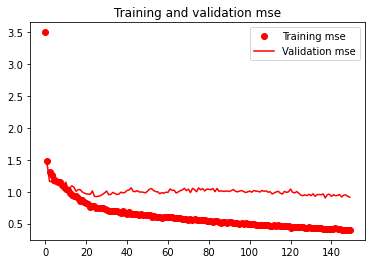

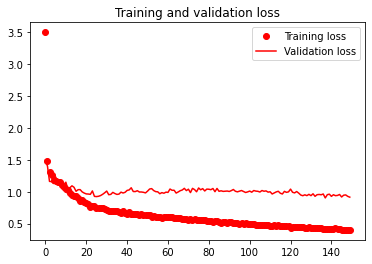

In [34]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse',c='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse',c='red')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',c='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes = model.predict([test_X_cell,test_X_drug])

In [36]:
predicted_value = predicted_classes

In [37]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [38]:
c.to_csv(workdir + '//ODC11K_CDRScan_pred_obs_table.csv')

In [39]:
c

,Predicted,Test
0,1.932220,2.079442
1,1.986228,2.079442
2,-3.170368,-3.747924
3,2.026366,2.079442
4,0.675293,-0.114399
...,...,...
1133,1.822054,2.079442
1134,2.104333,2.079442
1135,-2.987388,-2.327235
1136,1.933499,2.079442


In [40]:
predicted_value.shape

(1138, 1)

In [41]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.8058910605572851, intercept=0.19146422063814672, rvalue=0.8617718938471429, pvalue=0.0, stderr=0.014075254644163484)

In [42]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7372624101452128


In [43]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.9561105876354807


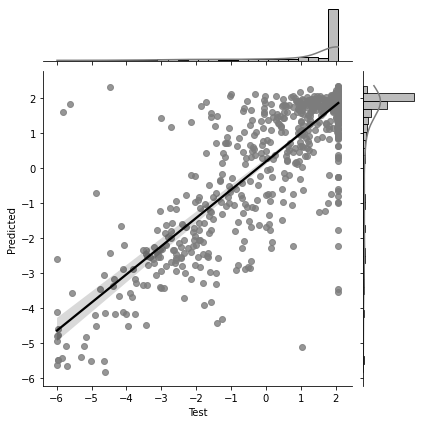

In [44]:
workdir = "D://EODC-11K//Result//Fig_ODC-11K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//ODC11K_CDRScan.png', dpi=300)